In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PROCESSED = Path("../data/processed")
df = pd.read_parquet(DATA_PROCESSED / "technova_central_clean.parquet")

print("✅ Dataset chargé :", df.shape)
df.head(3)


✅ Dataset chargé : (1470, 34)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,3,1,4,2,2,Autre,Y,Occasionnel,0,0


In [3]:
# Variable cible
y = df["a_quitte_l_entreprise"]

# Features : on retire la cible et les identifiants inutiles
X = df.drop(columns=["a_quitte_l_entreprise", "id_employee", "eval_number", "code_sondage"])

print("X :", X.shape)
print("y :", y.shape)


X : (1470, 30)
y : (1470,)


In [4]:
cat_cols = X.select_dtypes("object").columns.tolist()
print("Colonnes catégorielles :", cat_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("✅ Données encodées :", X_encoded.shape)

Colonnes catégorielles : ['genre', 'statut_marital', 'departement', 'poste', 'heure_supplementaires', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement']
✅ Données encodées : (1470, 43)


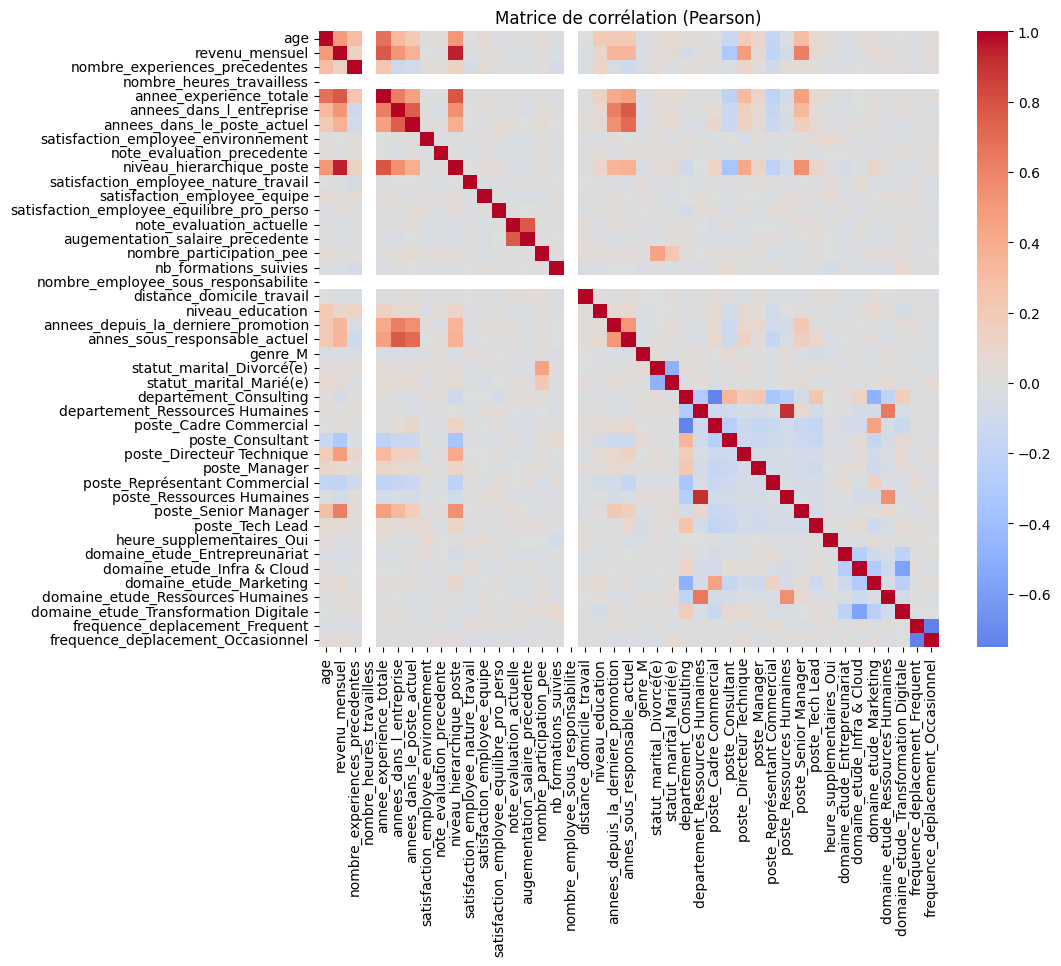

In [5]:
corr = X_encoded.corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (Pearson)")
plt.show()


In [6]:
# Supprimer les colonnes sans variance
X_encoded = X_encoded.loc[:, X_encoded.nunique() > 1]

# Supprimer corrélations fortes > 0.9
corr_matrix = X_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]
X_encoded = X_encoded.drop(columns=to_drop)

print("✅ Après nettoyage :", X_encoded.shape)


✅ Après nettoyage : (1470, 39)


In [7]:
X_encoded.to_parquet(DATA_PROCESSED / "X_encoded.parquet", index=False)
y.to_frame("target").to_parquet(DATA_PROCESSED / "y_target.parquet", index=False)
print("✅ X et y sauvegardés pour modélisation")


✅ X et y sauvegardés pour modélisation
